## Support Vector Machine

In [8]:
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
cell_data = pd.read_csv("../data/cell_samples.csv")
cell_data.sample(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
567,1334071,4,1,1,1,2,3,2,1,1,2
573,324382,1,1,1,1,2,1,2,1,1,2
472,1257608,6,1,1,1,1,1,1,1,1,2
284,508234,7,4,5,10,2,10,3,8,2,4
275,432809,3,1,3,1,2,?,2,1,1,2


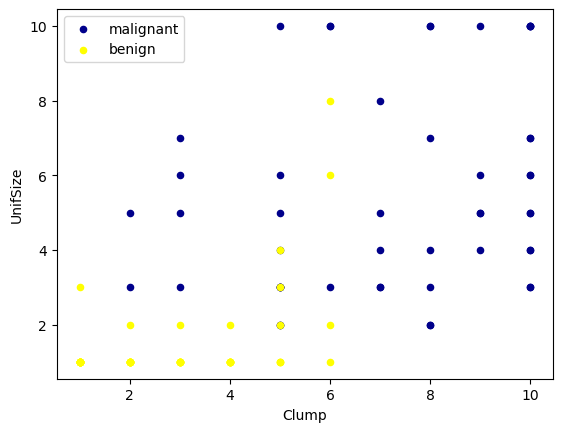

In [13]:
ax = cell_data[cell_data['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_data[cell_data['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

Advantages :
    - memeory efficient : uses a subset of training points in the decision function (subset : support vectors)
    - accurate in high dimensional space

Disadvantages :

- prone to over-fitting 

- small dataset (<1000 size)

- no probability estimation
    
- longer training time duration

Useage Areas:
- Image Recognition
- Text category assignment
- Bioinformatic data (gene expression)
- Spam detection

In [12]:
cell_data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [15]:
cell_data = cell_data[pd.to_numeric(cell_data['BareNuc'], errors='coerce').notnull()]
cell_data['BareNuc'] = cell_data['BareNuc'].astype('int')

In [17]:
feature_df = cell_data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)

In [18]:
cell_data['Class'] = cell_data['Class'].astype('int')
y = np.asarray(cell_data['Class'])

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

In [20]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [21]:
y_pred = clf.predict(X_test)

# Evaluation

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[86  3]
 [ 1 47]]


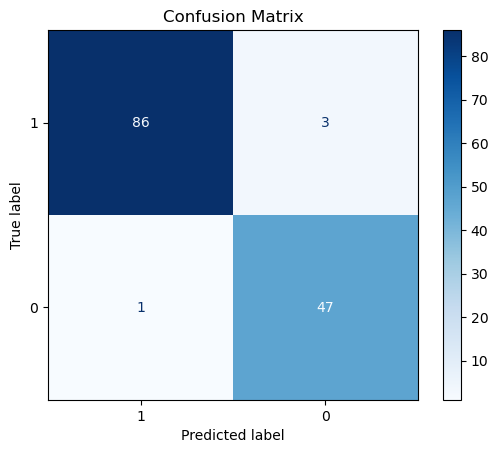

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1,0])
disp.plot(cmap="Blues", values_format="d")
plt.title('Confusion Matrix')
plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.99      0.97      0.98        89
           4       0.94      0.98      0.96        48

    accuracy                           0.97       137
   macro avg       0.96      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137

